In [23]:
#importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
#loading data
df = pd.read_csv('diabetes.csv')

#showing data
print('data :\n', df.head())

#data shape
print('data shape :', df.shape)

data :
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
data shape : (768, 9)


In [17]:
#splitting input and output data
#input
X = df.drop(columns=['Outcome'])
print('input :\n', X.head())

#output
y = df['Outcome'].values
print('output :\n', y[0:10])

input :
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  
output :
 [1 0 1 0 1 0 1 0 1 1]


In [18]:
#Scaling data "rearanging data"
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
print("X after rearanging data :\n", X)

X after rearanging data :
 [[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [19]:
#Splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#Splitted Data
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (514, 8)
X_test shape is  (254, 8)
y_train shape is  (514,)
y_test shape is  (254,)


In [20]:
#Applying KNeighborsClassifier Model 
#splitting data into classes

'''
#sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform’, algorithm=’auto’, leaf_size=30,
#                                       p=2, metric='minkowski’, metric_params=None,n_jobs=None)
'''
from sklearn.neighbors import KNeighborsClassifier
KNNClassifierModel = KNeighborsClassifier(n_neighbors= 4,weights ='uniform', # it can be distance
                                          algorithm='auto') # it can be ball_tree, kd_tree,brute
KNNClassifierModel.fit(X_train, y_train)

#Calculating Details
print('KNNClassifierModel Train Score is : ' , KNNClassifierModel.score(X_train, y_train))
print('KNNClassifierModel Test Score is : ' , KNNClassifierModel.score(X_test, y_test))

KNNClassifierModel Train Score is :  0.8151750972762646
KNNClassifierModel Test Score is :  0.7047244094488189


In [21]:
#Calculating Prediction
y_pred = KNNClassifierModel.predict(X_test)
y_pred_prob = KNNClassifierModel.predict_proba(X_test)
print('Predicted Value for KNNClassifierModel is : \n' , y_pred[:10])
print('Prediction Probabilities Value for KNNClassifierModel is : \n' , y_pred_prob[:10])

#calculating actual data
print('Actual value are :\n',y_test[:10])

Predicted Value for KNNClassifierModel is : 
 [0 0 0 0 1 0 0 0 1 0]
Prediction Probabilities Value for KNNClassifierModel is : 
 [[0.75 0.25]
 [0.75 0.25]
 [0.75 0.25]
 [0.75 0.25]
 [0.25 0.75]
 [1.   0.  ]
 [1.   0.  ]
 [0.5  0.5 ]
 [0.25 0.75]
 [0.75 0.25]]
Actual value are :
 [0 0 0 0 0 0 0 0 0 0]


Confusion Matrix is : 
 [[147  21]
 [ 54  32]]


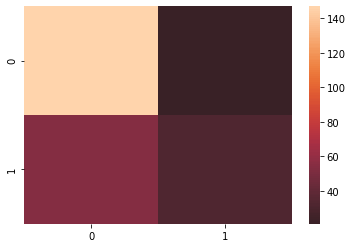

In [25]:
#Calculating Confusion Matrix
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, center = True)
plt.show()